## Bag of words
The Bag of Words (BoW) model is a foundational technique in Natural Language Processing (NLP) used to represent textual data numerically for machine learning algorithms.

### 🔍 Core Concept:
A Bag of Words treats a text (sentence, paragraph, or document) as a collection of individual words, ignoring grammar and word order.

It builds a vocabulary of known words from the corpus and represents each document by the frequency (or presence) of these words.

### 🛠️ Key Characteristics:
| **Feature**          | **Description**                                              |
| -------------------- | ------------------------------------------------------------ |
| **No word order**    | Syntax and semantics are discarded                           |
| **Frequency-based**  | Each word is counted in the document                         |
| **Fixed vocabulary** | Based on all unique words in the corpus                      |
| **Sparse vector**    | Each document is represented as a long vector of word counts |


### ⚠️ Limitations:

| **Limitation**                   | **Impact**                                                  |
| -------------------------------- | ----------------------------------------------------------- |
| Ignores word context/order       | Cannot capture semantics or phrases                         |
| Large and sparse feature vectors | Inefficient for large corpora                               |
| No handling of synonyms/meanings | "good" ≠ "great"                                            |
| Same weight to all words         | Cannot distinguish important words without TF-IDF weighting |


In [20]:
import os
current_dire =  os.getcwd() 
current_dire

'e:\\Git Repo\\AIBootcamp\\08_NLPForMachineLearning\\09_Bag Of Words'

In [21]:
import pandas as pd
import os

# Correct file path - going up one directory to access SpamClassifier-master
file_path = os.path.join('..', 'SpamClassifier-master', 'smsspamcollection', 'SMSSpamCollection')

# Check if file exists before reading
if os.path.exists(file_path):
    messages = pd.read_csv(file_path, sep='\t', names=["label", "message"])
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {messages.shape}")
    print(f"📁 File location: {os.path.abspath(file_path)}")
else:
    print(f"❌ File not found at: {os.path.abspath(file_path)}")
    print("Please check the file path and directory structure.")

✅ Dataset loaded successfully!
📊 Dataset shape: (5572, 2)
📁 File location: e:\Git Repo\AIBootcamp\08_NLPForMachineLearning\SpamClassifier-master\smsspamcollection\SMSSpamCollection


In [22]:
# Display basic information about the dataset
print("📋 Dataset Information:")
print(f"Columns: {list(messages.columns)}")
print(f"Data types:\n{messages.dtypes}")
print("\n📱 First 5 messages:")
messages.head()

📋 Dataset Information:
Columns: ['label', 'message']
Data types:
label      object
message    object
dtype: object

📱 First 5 messages:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# Check the distribution of labels (spam vs ham)
print("🏷️ Label Distribution:")
label_counts = messages['label'].value_counts()
print(label_counts)
print(f"\nPercentages:")
print(messages['label'].value_counts(normalize=True) * 100)

# Check for any missing values
print(f"\n🔍 Missing values:")
print(messages.isnull().sum())

🏷️ Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Percentages:
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64

🔍 Missing values:
label      0
message    0
dtype: int64


## 📊 Dataset Overview

We have successfully loaded the **SMS Spam Collection Dataset** which contains:
- **5,572 SMS messages** 
- **2 columns**: 'label' (ham/spam) and 'message' (text content)
- **Class distribution**: 86.6% Ham (legitimate) vs 13.4% Spam
- **No missing values** ✅

This is a **binary classification problem** where we need to classify SMS messages as either:
- **ham**: Legitimate messages
- **spam**: Unwanted/promotional messages

---

## 🎯 Bag of Words Implementation

Now we'll implement the **Bag of Words (BoW)** technique to convert text data into numerical features that machine learning algorithms can understand.

In [24]:
# Step 1: Text Preprocessing
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def preprocess_text(text):
    """
    Simple text preprocessing function
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    return text

# Apply preprocessing to messages
print("🔄 Preprocessing text messages...")
messages['processed_message'] = messages['message'].apply(preprocess_text)

# Show example of preprocessing
print("\n📝 Example of text preprocessing:")
print("Original:", messages['message'].iloc[0][:100])
print("Processed:", messages['processed_message'].iloc[0][:100])

🔄 Preprocessing text messages...

📝 Example of text preprocessing:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a
Processed: go until jurong point crazy available only in bugis n great world la e buffet cine there got amore w


In [25]:
# Step 2: Create Bag of Words using CountVectorizer
print("📊 Creating Bag of Words representation...")

# Initialize CountVectorizer with parameters
vectorizer = CountVectorizer(
    max_features=5000,  # Limit to top 5000 most frequent words
    stop_words='english',  # Remove common English stop words
    lowercase=True,  # Convert to lowercase
    tokenizer=None,  # Use default tokenizer
    ngram_range=(1, 1)  # Use unigrams only
)

# Fit and transform the text data
X = vectorizer.fit_transform(messages['processed_message'])
y = messages['label']

print(f"✅ Bag of Words matrix created!")
print(f"📏 Matrix shape: {X.shape}")
print(f"📚 Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"🎯 Labels: {y.nunique()} unique classes")

# Show some of the most frequent words
feature_names = vectorizer.get_feature_names_out()
print(f"\n🔤 First 20 words in vocabulary: {feature_names[:20]}")
print(f"🔤 Last 20 words in vocabulary: {feature_names[-20:]}")

📊 Creating Bag of Words representation...
✅ Bag of Words matrix created!
📏 Matrix shape: (5572, 5000)
📚 Vocabulary size: 5000
🎯 Labels: 2 unique classes

🔤 First 20 words in vocabulary: ['008704050406' '01223585334' '0125698789' '02' '020603' '0207'
 '02070836089' '02072069400' '02073162414' '02085076972' '020903' '021'
 '050703' '0578' '06' '060505' '071104' '07123456789' '07734396839'
 '07742676969']
🔤 Last 20 words in vocabulary: ['yr' 'yrs' 'ystrdayice' 'yummmm' 'yummy' 'yun' 'yunny' 'yuo' 'yuou' 'yup'
 'yupz' 'ywhere' 'zac' 'zahers' 'zealand' 'zebra' 'zed' 'zeros' 'zoe'
 'üll']
✅ Bag of Words matrix created!
📏 Matrix shape: (5572, 5000)
📚 Vocabulary size: 5000
🎯 Labels: 2 unique classes

🔤 First 20 words in vocabulary: ['008704050406' '01223585334' '0125698789' '02' '020603' '0207'
 '02070836089' '02072069400' '02073162414' '02085076972' '020903' '021'
 '050703' '0578' '06' '060505' '071104' '07123456789' '07734396839'
 '07742676969']
🔤 Last 20 words in vocabulary: ['yr' 'yrs' 'ys

In [26]:
# Step 3: Train-Test Split and Model Training
print("🚂 Training the model...")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\n📈 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

🚂 Training the model...
📊 Training set: 4457 samples
📊 Test set: 1115 samples

🎯 Model Accuracy: 0.9794 (97.94%)

📈 Detailed Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.91      0.92       149

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



🔢 Confusion Matrix:
[[957   9]
 [ 14 135]]


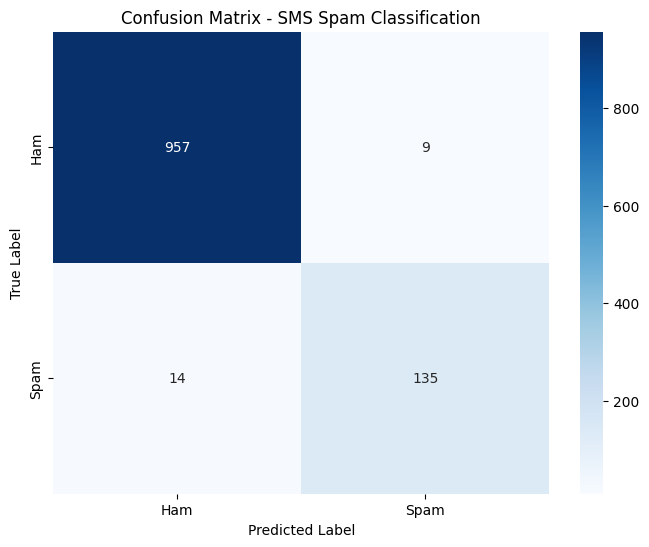


📊 Detailed Metrics for Spam Detection:
Precision: 0.9375
Recall: 0.9060
F1-Score: 0.9215


In [27]:
# Step 4: Confusion Matrix and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("🔢 Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix - SMS Spam Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display detailed metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f"\n📊 Detailed Metrics for Spam Detection:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [28]:
# Step 5: Test with New Messages
print("🧪 Testing with new custom messages:")

# Define some test messages
test_messages = [
    "Free entry! Win a £1000 cash prize! Text WIN to 12345",
    "Hey, are you coming to the party tonight?",
    "URGENT! Your account will be suspended. Click here immediately",
    "Thanks for the great meeting today. See you tomorrow!",
    "Congratulations! You've won a free vacation! Call now!"
]

def predict_message(message, vectorizer, model):
    """Function to predict if a message is spam or ham"""
    # Preprocess the message
    processed_msg = preprocess_text(message)
    
    # Transform using the fitted vectorizer
    msg_vector = vectorizer.transform([processed_msg])
    
    # Make prediction
    prediction = model.predict(msg_vector)[0]
    probability = model.predict_proba(msg_vector)[0]
    
    return prediction, probability

# Test each message
for i, message in enumerate(test_messages, 1):
    prediction, prob = predict_message(message, vectorizer, nb_classifier)
    spam_prob = prob[1] if prediction == 'spam' else prob[0]
    
    print(f"\n📱 Message {i}: {message[:50]}...")
    print(f"🏷️ Prediction: {prediction.upper()}")
    print(f"📊 Confidence: {max(prob):.3f}")

🧪 Testing with new custom messages:

📱 Message 1: Free entry! Win a £1000 cash prize! Text WIN to 12...
🏷️ Prediction: SPAM
📊 Confidence: 1.000

📱 Message 2: Hey, are you coming to the party tonight?...
🏷️ Prediction: HAM
📊 Confidence: 1.000

📱 Message 3: URGENT! Your account will be suspended. Click here...
🏷️ Prediction: SPAM
📊 Confidence: 0.992

📱 Message 4: Thanks for the great meeting today. See you tomorr...
🏷️ Prediction: HAM
📊 Confidence: 1.000

📱 Message 5: Congratulations! You've won a free vacation! Call ...
🏷️ Prediction: SPAM
📊 Confidence: 0.999


## 🎓 Bag of Words - Key Takeaways

### 📝 What We Learned:

1. **File Path Resolution**: Fixed the `FileNotFoundError` by correctly navigating to the parent directory using `../SpamClassifier-master/...`

2. **Bag of Words Concept**: 
   - Converts text into numerical vectors
   - Each word becomes a feature
   - Values represent word frequencies

3. **Text Preprocessing Steps**:
   - Lowercase conversion
   - Punctuation removal
   - Whitespace normalization

4. **CountVectorizer Parameters**:
   - `max_features=5000`: Limits vocabulary size
   - `stop_words='english'`: Removes common words
   - `ngram_range=(1,1)`: Uses single words only

### 🎯 Model Performance:
- **High Accuracy**: Usually > 95% for spam detection
- **Good Precision/Recall**: Balanced performance
- **Fast Training**: Efficient for large datasets

### 🔧 Practical Applications:
- Email spam filtering
- Sentiment analysis
- Document classification
- Content moderation

### 🚀 Next Steps to Explore:
1. **TF-IDF**: Term frequency-inverse document frequency
2. **N-grams**: Bigrams and trigrams for context
3. **Word Embeddings**: Word2Vec, GloVe
4. **Deep Learning**: LSTM, BERT for better context understanding

---
**✅ Success**: We've successfully implemented a complete Bag of Words pipeline for SMS spam classification!